## Import

In [1]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

%matplotlib inline

## Przygotowanie danych do uczenia

In [2]:
train_dir = 'dominika_unknown_dataset/dominika_unknown_dataset/train'
validation_dir = 'dominika_unknown_dataset/dominika_unknown_dataset/val'
test_dir = 'dominika_unknown_dataset/dominika_unknown_dataset/test'

train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(
        train_dir, 
        target_size=(200, 200),  
        batch_size=20,
        shuffle=True,
        class_mode='binary')

validation_dataset = validation.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=20,
        shuffle=True,
        class_mode='binary')


Found 2100 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [3]:
train_dataset.class_indices

{'Dominika': 0, 'Unknown': 1}

(20, 200, 200, 3)


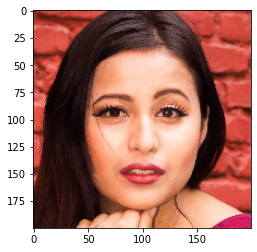

In [4]:
img, label = train_dataset.next()
print(img.shape)
plt.imshow(img[0])
plt.show()

## Model sieci

In [5]:
model = Sequential()

# Convolution & pooling - First convolution layer
model.add(Conv2D(16, (3, 3),
                      input_shape = (200,200,3),
                      activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution & pooling - Second convolution layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


# Convolution & pooling - Third convolution layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
model.add(Flatten())

# Full connection
model.add(Dense(512, activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

## Uczenie SSN

In [7]:
hist = model.fit(train_dataset, epochs = 15, validation_data = validation_dataset)

Epoch 1/15
105/105 [==============================] - 45s 426ms/step - loss: 0.4755 - accuracy: 0.8119 - val_loss: 0.5252 - val_accuracy: 0.7367
Epoch 2/15
105/105 [==============================] - 45s 426ms/step - loss: 0.2216 - accuracy: 0.9057 - val_loss: 0.1383 - val_accuracy: 0.9467
Epoch 3/15
105/105 [==============================] - 45s 426ms/step - loss: 0.1968 - accuracy: 0.9243 - val_loss: 0.0847 - val_accuracy: 0.9733
Epoch 4/15
105/105 [==============================] - 45s 423ms/step - loss: 0.1372 - accuracy: 0.9486 - val_loss: 0.1054 - val_accuracy: 0.9733
Epoch 5/15
105/105 [==============================] - 45s 429ms/step - loss: 0.0913 - accuracy: 0.9671 - val_loss: 0.1061 - val_accuracy: 0.9633
Epoch 6/15
105/105 [==============================] - 45s 426ms/step - loss: 0.0791 - accuracy: 0.9714 - val_loss: 0.0729 - val_accuracy: 0.9800
Epoch 7/15
105/105 [==============================] - 45s 429ms/step - loss: 0.0381 - accuracy: 0.9848 - val_loss: 0.1207 - val_ac

## Parametry

In [8]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


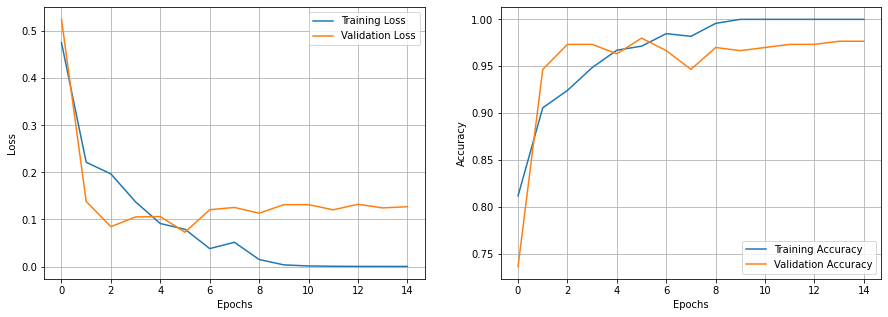

In [9]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.show()

## Predicting

In [10]:
test = ImageDataGenerator(rescale = 1./255)
test_dataset = test.flow_from_directory(test_dir,
                                        target_size = (200,200),
                                        batch_size = 3,
                                        class_mode = 'binary',
                                       shuffle = False)


predictions = model.predict_generator(test_dataset)
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

Found 600 images belonging to 2 classes.


C:\Users\domin\AppData\Local\Temp/ipykernel_19892/1777206825.py:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_dataset)


## Confusion matrix

In [11]:
cm = pd.DataFrame(data=confusion_matrix(test_dataset.classes, predictions, labels=[1, 0]),
                  index=["Actual Unknown", "Actual Dominika"],
                  columns=["Predicted Unknown", "Predicted Dominika"])
cm

,Predicted Unknown,Predicted Dominika
Actual Unknown,300,0
Actual Dominika,6,294


## Saving the model

In [12]:
model.save('dominika_unknown-model2.h5')